In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
#Ignore warnings
import warnings
import scipy
from datetime import datetime
from platform import python_version
import statsmodels.api as sm
import matplotlib.dates as mdates
print(python_version())
warnings.filterwarnings('ignore')

3.9.7


['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford', 'Aylesbury Vale', 'Babergh', 'Barking and Dagenham', 'Barnet', 'Barnsley', 'Barrow-in-Furness', 'Basildon', 'Basingstoke and Deane', 'Bassetlaw', 'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham', 'Blaby', 'Blackburn with Darwen', 'Blackpool', 'Blaenau Gwent', 'Bolsover', 'Bolton', 'Boston', 'Bournemouth', 'Bracknell Forest', 'Bradford', 'Braintree', 'Breckland', 'Brent', 'Brentwood', 'Bridgend', 'Brighton and Hove', 'Bristol', 'Broadland', 'Bromley', 'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Burnley', 'Bury', 'Caerphilly', 'Calderdale', 'Cambridge', 'Camden', 'Cannock Chase', 'Canterbury', 'Cardiff', 'Carlisle', 'Carmarthenshire', 'Castle Point', 'Central Bedfordshire', 'Ceredigion', 'Charnwood', 'Chelmsford', 'Cheltenham', 'Cherwell', 'Cheshire East', 'Cheshire West and Chester', 'Chesterfield', 'Chichester', 'Chiltern', 'Chorley', 'Christchurch', 'City of London', 'Colchester', 'Conwy', 'Copeland', '

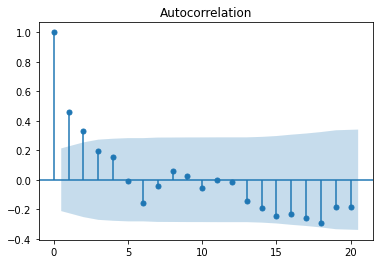

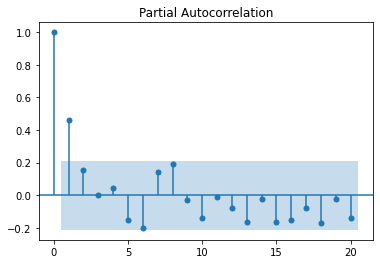

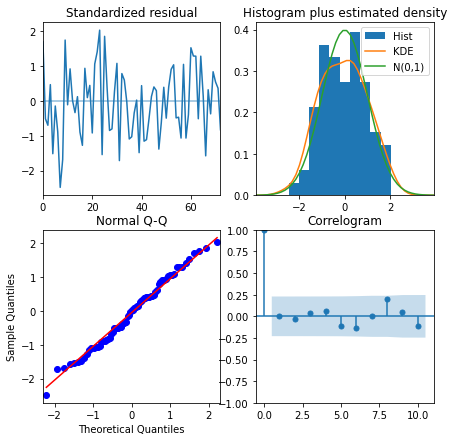

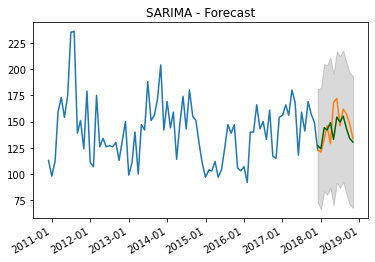

In [42]:
burg = 'burglarys city'
col = burg
n_periods = 12
city = 'Blackpool'

df = pd.read_csv('C:\\Users\\20203666\\Documents\\JBG050-data\\final_burglary_data_city1.csv')
print(sorted(df['city'].unique()))
df['year month'] = [datetime.strptime(date, '%Y-%m') for date in df['year month']]
df_city = df.loc[df['city'] == city]
# Reset index to stop expected value error

df_city_index_reset = df_city.reset_index(drop = True)

#Sort it on year/month to perform ARIMA
df_city_sorted = df_city_index_reset.set_index(df_city_index_reset['year month'])

#Create test partition
df_city_train = df_city_sorted['2010-12':'2017-12']
df_city_test  = df_city_sorted['2017-12':'2019-12']
plot_acf(df_city_train[col].dropna())
plot_pacf(df_city_train[col].dropna())

smodel = auto_arima(df_city_train[col].dropna(), start_p=1, start_q=1,
                    test='adf',
                    max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True,
                    d=0, D=1, trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
print(smodel.summary())

fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = df_city_test.index[:n_periods]

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

smodel.plot_diagnostics(figsize=(7, 7))
plt.show()

# Plot
plt.plot(df_city_train[col].dropna())
plt.plot(df_city_test[col][:n_periods].dropna())
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
plt.title("SARIMA - Forecast")
plt.show()

In [43]:
print('MAE:', mean_absolute_error(df_city_test[col][:n_periods].dropna(), fitted_series))

MAE: 11.395661631481063


### Read datasets

In [242]:

df = pd.read_csv('C:\\Users\\20203666\\Documents\\JBG050-data\\final_burglary_data_city1.csv')

In [243]:
print(df['city'].unique())

['Adur' 'Allerdale' 'Amber Valley' 'Arun' 'Ashfield' 'Ashford'
 'Aylesbury Vale' 'Babergh' 'Barking and Dagenham' 'Barnet' 'Barnsley'
 'Barrow-in-Furness' 'Basildon' 'Basingstoke and Deane' 'Bassetlaw'
 'Bath and North East Somerset' 'Bedford' 'Bexley' 'Birmingham' 'Blaby'
 'Blackburn with Darwen' 'Blackpool' 'Blaenau Gwent' 'Bolsover' 'Bolton'
 'Boston' 'Bournemouth' 'Bracknell Forest' 'Bradford' 'Braintree'
 'Breckland' 'Brent' 'Brentwood' 'Bridgend' 'Brighton and Hove' 'Bristol'
 'Broadland' 'Bromley' 'Bromsgrove' 'Broxbourne' 'Broxtowe' 'Burnley'
 'Bury' 'Caerphilly' 'Calderdale' 'Cambridge' 'Camden' 'Cannock Chase'
 'Canterbury' 'Cardiff' 'Carlisle' 'Carmarthenshire' 'Castle Point'
 'Central Bedfordshire' 'Ceredigion' 'Charnwood' 'Chelmsford' 'Cheltenham'
 'Cherwell' 'Cheshire East' 'Cheshire West and Chester' 'Chesterfield'
 'Chichester' 'Chiltern' 'Chorley' 'Christchurch' 'City of London'
 'Colchester' 'Conwy' 'Copeland' 'Corby' 'Cornwall' 'Cotswold'
 'County Durham' 'Coventry' 

In [244]:
city = 'West Oxfordshire'

df_city = df.loc[df['city'] == city]
df_city


,Unnamed: 0,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,police district,year month
327,327,-1.506846,51.783793,12.0,10.0,315250.0,29.0,2.0,West Oxfordshire,Thames Valley Police,2010-12
673,673,-1.550582,51.788562,1.0,11.0,375000.0,40.0,2.0,West Oxfordshire,Thames Valley Police,2011-1
1020,1020,-1.516103,51.826781,2.0,11.0,337500.0,27.0,1.0,West Oxfordshire,Thames Valley Police,2011-2
1367,1367,-1.495754,51.793400,3.0,11.0,385000.0,43.0,2.0,West Oxfordshire,Thames Valley Police,2011-3
1714,1714,-1.514900,51.790915,4.0,11.0,334500.0,32.0,1.5,West Oxfordshire,Thames Valley Police,2011-4
...,...,...,...,...,...,...,...,...,...,...,...
43840,43840,-1.479569,51.793599,6.0,21.0,353750.0,16.0,1.0,West Oxfordshire,Thames Valley Police,2021-6
44171,44171,-1.541098,51.793760,7.0,21.0,357500.0,39.0,2.0,West Oxfordshire,Thames Valley Police,2021-7
44504,44504,-1.490620,51.848264,8.0,21.0,360000.0,15.0,1.0,West Oxfordshire,Thames Valley Police,2021-8
44836,44836,-1.487316,51.816310,9.0,21.0,392500.0,21.0,1.0,West Oxfordshire,Thames Valley Police,2021-9


In [245]:
df.head()

,Unnamed: 0,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,police district,year month
0,0,-0.252285,50.834953,12.0,10.0,290500.0,33.0,2.0,Adur,Sussex Police,2010-12
1,1,-3.440349,54.698378,12.0,10.0,106500.0,34.0,2.5,Allerdale,Cumbria Constabulary,2010-12
2,2,-1.388190,53.027519,12.0,10.0,157500.0,57.0,2.0,Amber Valley,Derbyshire Constabulary,2010-12
3,3,-0.635302,50.807425,12.0,10.0,265500.0,62.0,2.0,Arun,Sussex Police,2010-12
4,4,-1.256562,53.105927,12.0,10.0,126500.0,78.0,2.0,Ashfield,Nottinghamshire Police,2010-12


<AxesSubplot:xlabel='month'>

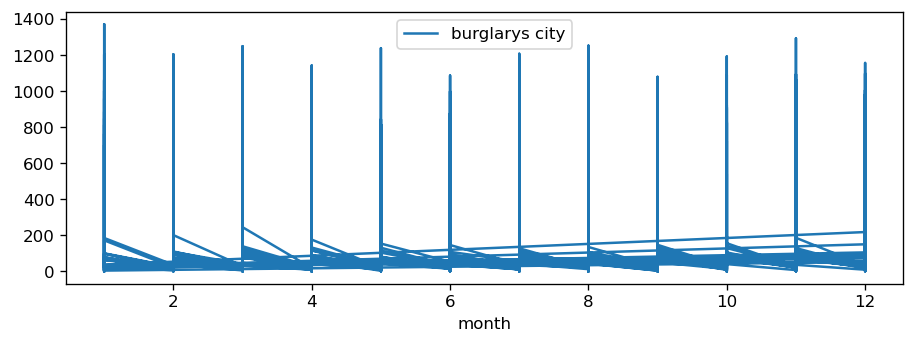

In [246]:
df[['month','burglarys city']].plot(x='month', y='burglarys city')

<AxesSubplot:title={'center':'Burglarys in West Oxfordshire'}, xlabel='year month'>

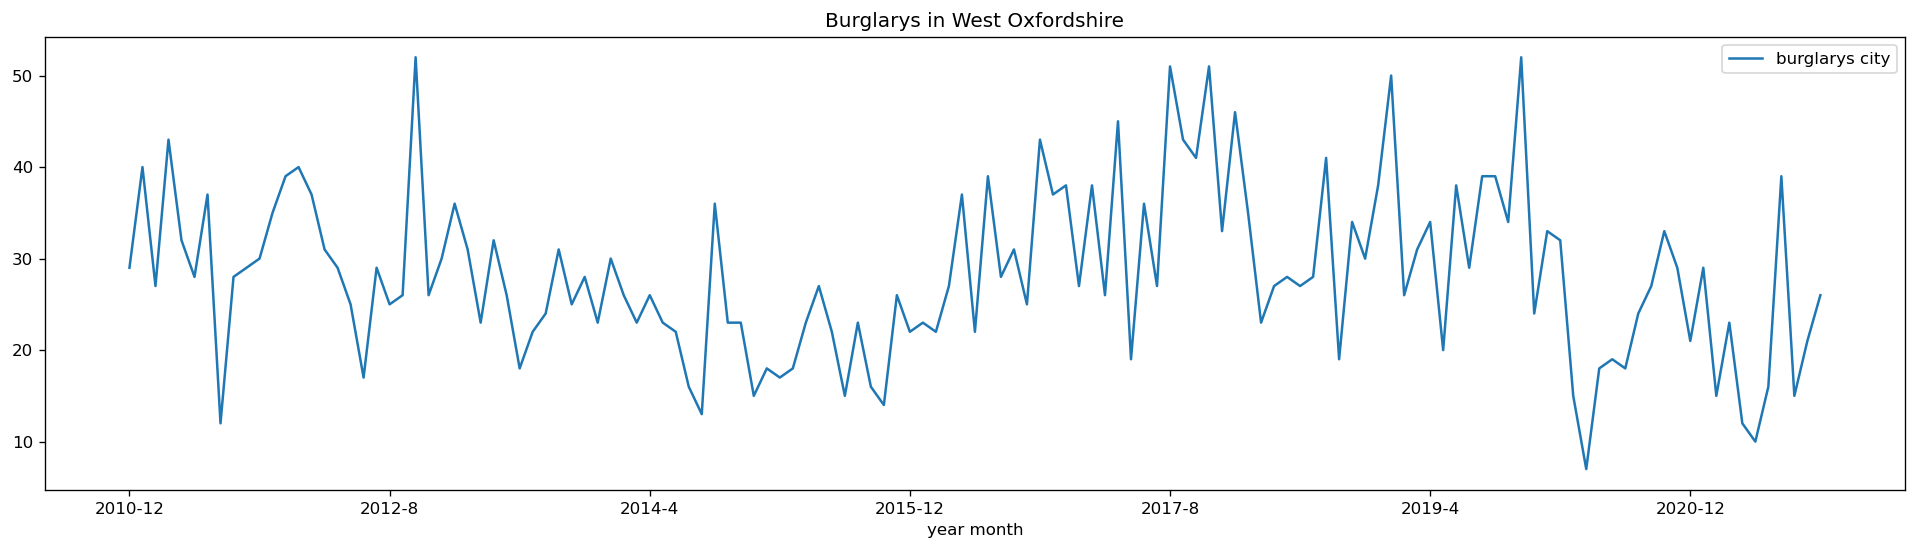

In [247]:
df_city[['year month', 'burglarys city', 'median house price']].plot(x='year month', y='burglarys city', title='Burglarys in '+ city, figsize=(20,5))

In [248]:
rolling_mean = df_city['burglarys city'].rolling(window = 12).mean()


In [249]:
#plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean'')

df_city['rolling_mean'] = rolling_mean

df_city


,Unnamed: 0,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,police district,year month,rolling_mean
327,327,-1.506846,51.783793,12.0,10.0,315250.0,29.0,2.0,West Oxfordshire,Thames Valley Police,2010-12,NaN
673,673,-1.550582,51.788562,1.0,11.0,375000.0,40.0,2.0,West Oxfordshire,Thames Valley Police,2011-1,NaN
1020,1020,-1.516103,51.826781,2.0,11.0,337500.0,27.0,1.0,West Oxfordshire,Thames Valley Police,2011-2,NaN
1367,1367,-1.495754,51.793400,3.0,11.0,385000.0,43.0,2.0,West Oxfordshire,Thames Valley Police,2011-3,NaN
1714,1714,-1.514900,51.790915,4.0,11.0,334500.0,32.0,1.5,West Oxfordshire,Thames Valley Police,2011-4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
43840,43840,-1.479569,51.793599,6.0,21.0,353750.0,16.0,1.0,West Oxfordshire,Thames Valley Police,2021-6,21.416667
44171,44171,-1.541098,51.793760,7.0,21.0,357500.0,39.0,2.0,West Oxfordshire,Thames Valley Police,2021-7,23.166667
44504,44504,-1.490620,51.848264,8.0,21.0,360000.0,15.0,1.0,West Oxfordshire,Thames Valley Police,2021-8,22.416667
44836,44836,-1.487316,51.816310,9.0,21.0,392500.0,21.0,1.0,West Oxfordshire,Thames Valley Police,2021-9,21.916667


<AxesSubplot:xlabel='year month'>

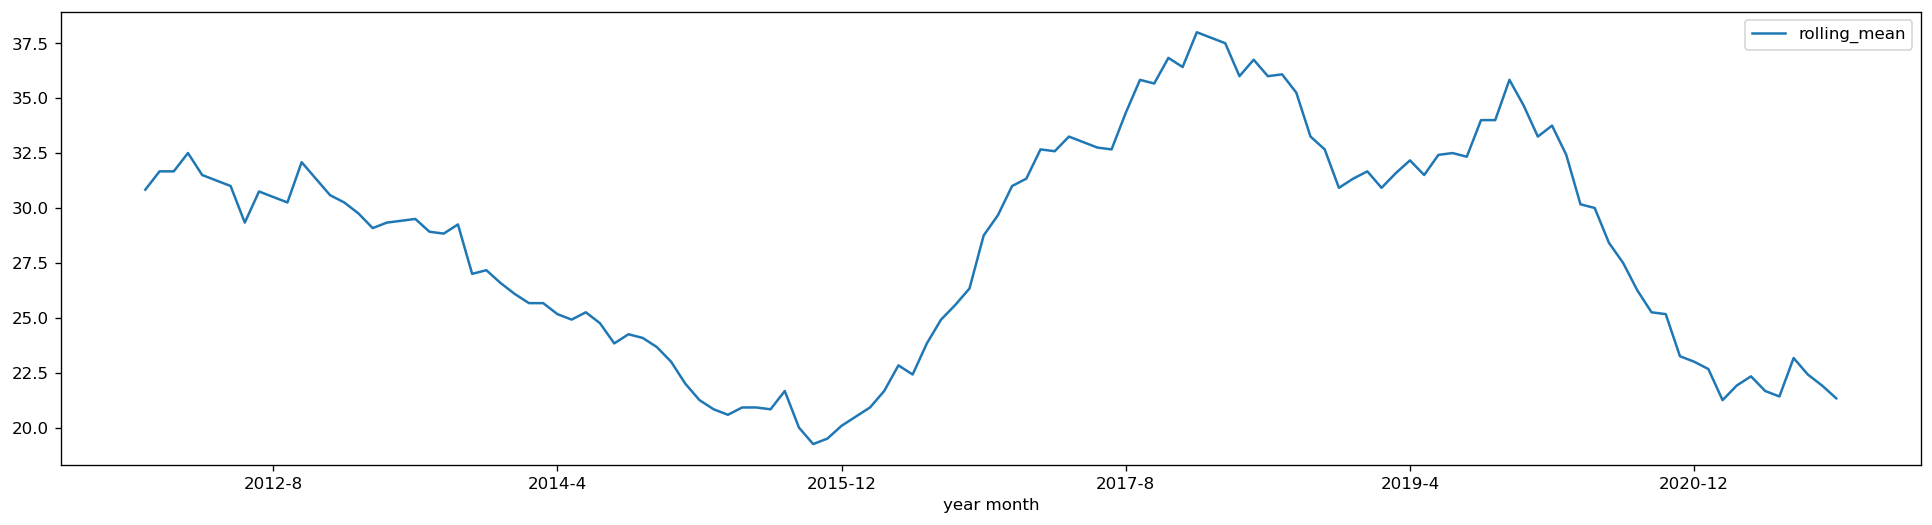

In [250]:
df_city.plot(x='year month', y='rolling_mean', figsize=(20,5))

In [251]:
# Reset index to stop expected value error
df_city_index_reset = df_city.reset_index(drop = True)

#Sort it on year/month to perform ARIMA 
df_city_sorted = df_city_index_reset.set_index(df_city_index_reset['year month'])
df_city_sorted

#Create test partition
df_city_train = df_city_sorted['2010-12':'2017-12']
df_city_test  = df_city_sorted['2017-12':'2019-12']
print('Train Dataset:',df_city_train.shape)
print('Test Dataset:',df_city_test.shape)

Train Dataset: (85, 12)
Test Dataset: (25, 12)


In [252]:
# df_city_train = df_city_train[['year month', 'burglarys city']]
# df_city_test = df_city_test[['year month', 'burglarys city']]

In [253]:
df_city_train['Longitude']

year month
2010-12   -1.506846
2011-1    -1.550582
2011-2    -1.516103
2011-3    -1.495754
2011-4    -1.514900
             ...   
2017-8    -1.544070
2017-9    -1.531649
2017-10   -1.551669
2017-11   -1.546215
2017-12   -1.485403
Name: Longitude, Length: 85, dtype: float64

# Code below not working yet

In [254]:
# #Import MSE module
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# #Create a history list and prediction list used for the ARIMA function
# history = [x for x in df_city_train]
# predictions = list()

# #Create the ARIMA for-loop
# for t in range(len(df_city_test)):
# 	model = ARIMA(history, order=(4,1,0))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = df_city_test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(df_city_test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

## Attempt 2

In [182]:
print('shape of data:', df_city_sorted.shape)
df_city_sorted.head()

shape of data: (131, 12)


,Unnamed: 0,Longitude,Latitude,month,year,median house price,burglarys city,burglarys lsoa,city,police district,year month,rolling_mean
year month,,,,,,,,,,,,
2010-12,327,-1.506846,51.783793,12.0,10.0,315250.0,29.0,2.0,West Oxfordshire,Thames Valley Police,2010-12,NaN
2011-1,673,-1.550582,51.788562,1.0,11.0,375000.0,40.0,2.0,West Oxfordshire,Thames Valley Police,2011-1,NaN
2011-2,1020,-1.516103,51.826781,2.0,11.0,337500.0,27.0,1.0,West Oxfordshire,Thames Valley Police,2011-2,NaN
2011-3,1367,-1.495754,51.793400,3.0,11.0,385000.0,43.0,2.0,West Oxfordshire,Thames Valley Police,2011-3,NaN
2011-4,1714,-1.514900,51.790915,4.0,11.0,334500.0,32.0,1.5,West Oxfordshire,Thames Valley Police,2011-4,NaN


In [183]:
df_city_sorted.index

Index(['2010-12', '2011-1', '2011-2', '2011-3', '2011-4', '2011-5', '2011-6',
       '2011-7', '2011-8', '2011-9',
       ...
       '2021-1', '2021-2', '2021-3', '2021-4', '2021-5', '2021-6', '2021-7',
       '2021-8', '2021-9', '2021-10'],
      dtype='object', name='year month', length=131)

# Stationarity check




In [184]:
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print('1. ADF: ',dftest[0])
  print('2. P-value: ',dftest[1])
  print('3. Num of Lags: ',dftest[2])
  print('4. Num of observations for ADF REgressiom and Critical Values Calculation :',dftest[3])
  print('5. Critical values: ')
  for key, val in dftest[4].items():
    print('\t',key,':', val)

In [185]:
ad_test(df_city_sorted['burglarys city'])

1. ADF:  -3.521548974264109
2. P-value:  0.007450613437173746
3. Num of Lags:  2
4. Num of observations for ADF REgressiom and Critical Values Calculation : 128
5. Critical values: 
	 1% : -3.4825006939887997
	 5% : -2.884397984161377
	 10% : -2.578960197753906


Determine order for ARIMA Model

In [186]:
stepwise_fit = auto_arima(df_city_train['burglarys city'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=597.162, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=615.196, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=608.821, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=612.562, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=820.371, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=595.395, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=601.110, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=597.322, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=595.473, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=597.957, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=595.305, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=594.327, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=595.208, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=597.202, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=605.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -293.164
Date:                Tue, 29 Mar 2022   AIC                            594.327
Time:                        17:14:36   BIC                            604.098
Sample:                             0   HQIC                           598.257
                                 - 85                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.2360      3.729      3.013      0.003       3.928      18.544
ar.L1          0.1757      0.104      1.693      0.090      -0.028       0.379
ar.L2          0.4368      0.117      3.746      0.000       0.208       0.665
sigma2        57.6219      8.323      6.923      0.000      41.309      73.934
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 6.96
Prob(Q):                              0.68   Prob(JB):                         0.03
Heteroskedasticity (H):               0.92   Skew:                             0.61
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [187]:

model = sm.tsa.statespace.SARIMAX(df_city_train['burglarys city'],order=(1, 0, 2),seasonal_order=(0,0,0,0))
results=model.fit()

#model = SARIMAX(df.value, order=(1,0,2))
#model_fit = model.fit(disp=0)
#print(model_fit.summary())

In [188]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         burglarys city   No. Observations:                   85
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -296.790
Date:                Tue, 29 Mar 2022   AIC                            601.579
Time:                        17:14:36   BIC                            611.350
Sample:                    12-01-2010   HQIC                           605.509
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.005    217.439      0.000       0.990       1.008
ma.L1         -0.8475      0.130     -6.508      0.000      -1.103      -0.592
ma.L2          0.0882      0.130      0.679      0.497      -0.166       0.343
sigma2        60.2307      8.094      7.441      0.000      44.366      76.095
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.16
Prob(Q):                              0.85   Prob(JB):                         0.12
Heteroskedasticity (H):               1.00   Skew:                             0.35
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [189]:
print(stepwise_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -293.164
Date:                Tue, 29 Mar 2022   AIC                            594.327
Time:                        17:14:36   BIC                            604.098
Sample:                             0   HQIC                           598.257
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.2360      3.729      3.013      0.003       3.928      18.544
ar.L1          0.1757      0.104      1.693      0.090      -0.028       0.379
ar.L2          0.4368      0.117      3.746      0.0

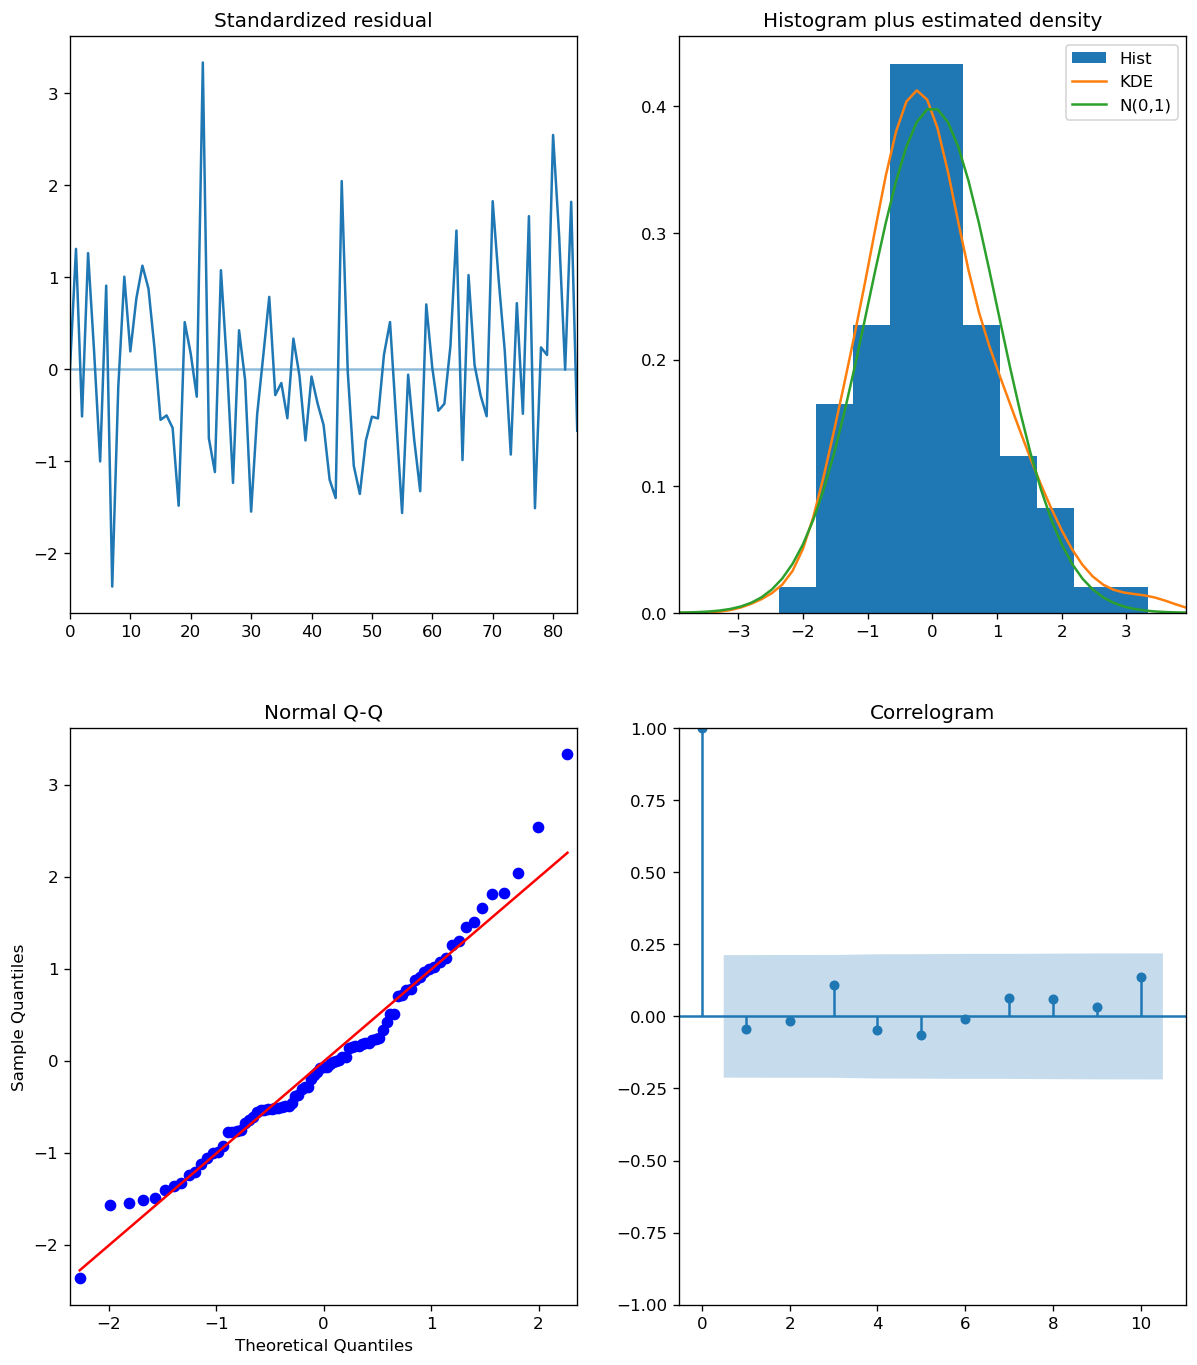

In [190]:
stepwise_fit.plot_diagnostics(figsize=(12, 14))
plt.show()

In [191]:
# The x and y have been swapped, it should be correct now.
# I feel like t
x = df_city_test.values


dates_list = []

for items in x:
  #print(items[9])
  dates_list.append(items[9])

x = dates_list
x = np.array(x)


In [192]:
df_city_test.shape[0]

24

ValueError: x and y must have same first dimension, but have shapes (0,) and (24,)

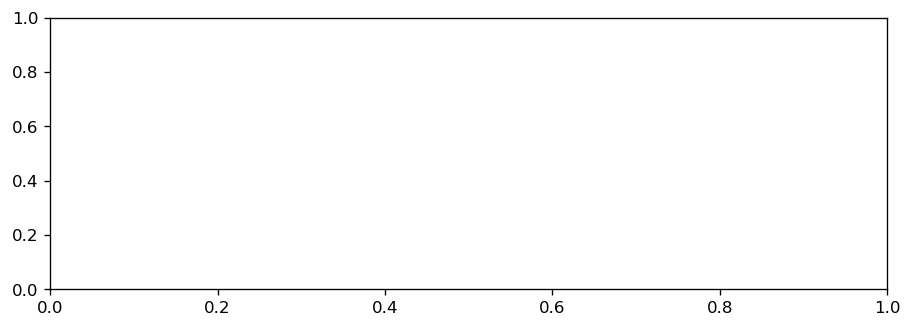

In [193]:
forecasts = stepwise_fit.predict(df_city_test.shape[0])
y = np.arange(x.shape[0])



plt.plot(y[100:], forecasts, c='green' , label = 'predicted')

In [ ]:
# Forecast
n_periods = 24
fc, confint = stepwise_fit.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df_city_test.value), len(df_city_test.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_city_test.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [ ]:
df_city_train

In [199]:
model = ARIMA(df_city_train['rolling_mean'].dropna(), order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:           rolling_mean   No. Observations:                   74
Model:                     ARMA(1, 0)   Log Likelihood                 -93.867
Method:                       css-mle   S.D. of innovations              0.840
Date:                Tue, 29 Mar 2022   AIC                            193.734
Time:                        17:16:41   BIC                            200.646
Sample:                    11-01-2011   HQIC                           196.491
                         - 12-01-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 31.5204      4.348      7.249      0.000      22.998      40.043
ar.L1.rolling_mean     0.9863      0.013     76.768      0.000       0.961       1.011
                    

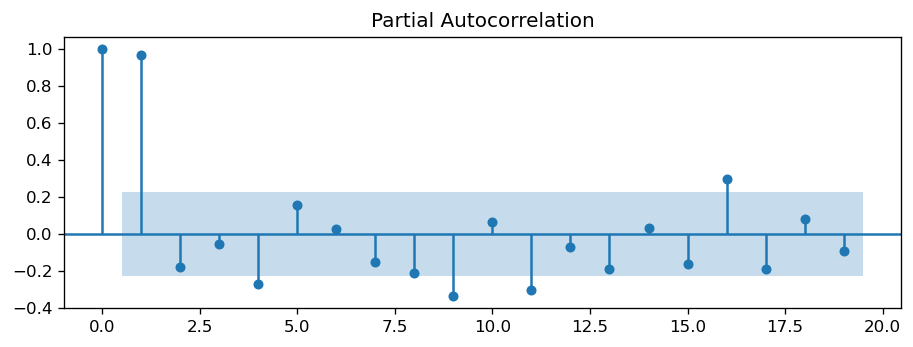

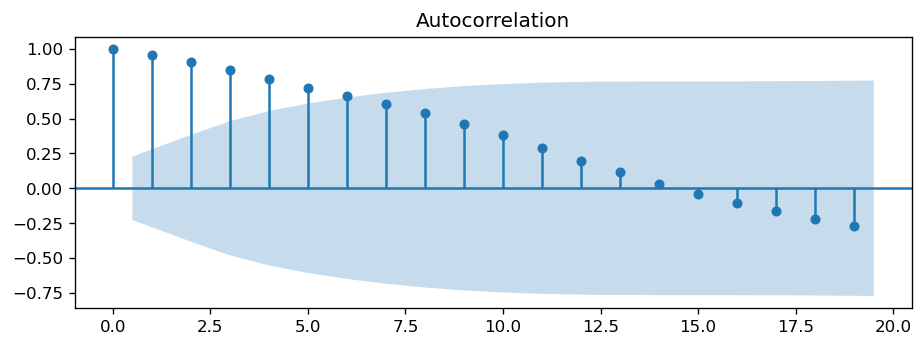

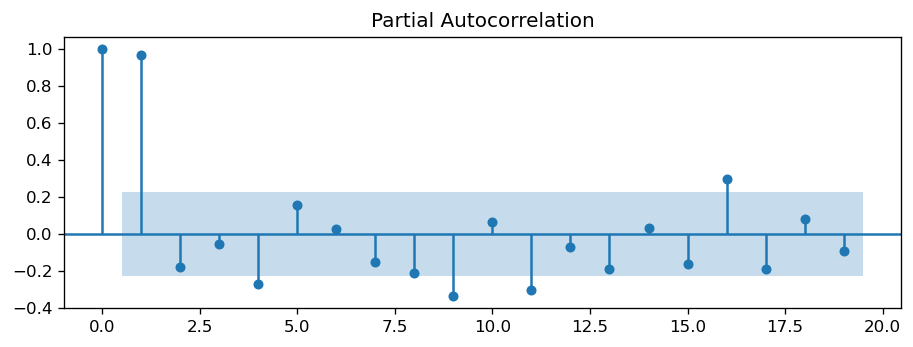

In [200]:
plot_acf(df_city_train['rolling_mean'].dropna())
plot_pacf(df_city_train['rolling_mean'].dropna())

                              ARMA Model Results                              
Dep. Variable:           rolling_mean   No. Observations:                   74
Model:                     ARMA(2, 0)   Log Likelihood                 -92.936
Method:                       css-mle   S.D. of innovations              0.829
Date:                Tue, 29 Mar 2022   AIC                            193.871
Time:                        17:17:00   BIC                            203.088
Sample:                    11-01-2011   HQIC                           197.548
                         - 12-01-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 31.0070      4.202      7.380      0.000      22.772      39.242
ar.L1.rolling_mean     1.1432      0.115      9.959      0.000       0.918       1.368
ar.L2.rolling_mean  

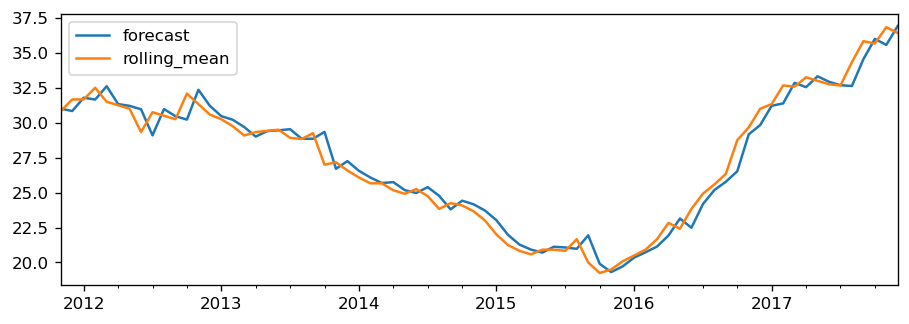

In [201]:
model = ARIMA(df_city_train['rolling_mean'].dropna(), order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
model_fit.plot_predict(dynamic=False)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=597.162, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=615.196, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=608.821, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=612.562, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=820.371, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=595.395, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=601.110, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=597.322, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=595.473, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=597.957, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=595.305, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=594.327, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=595.208, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=597.202, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=605.2

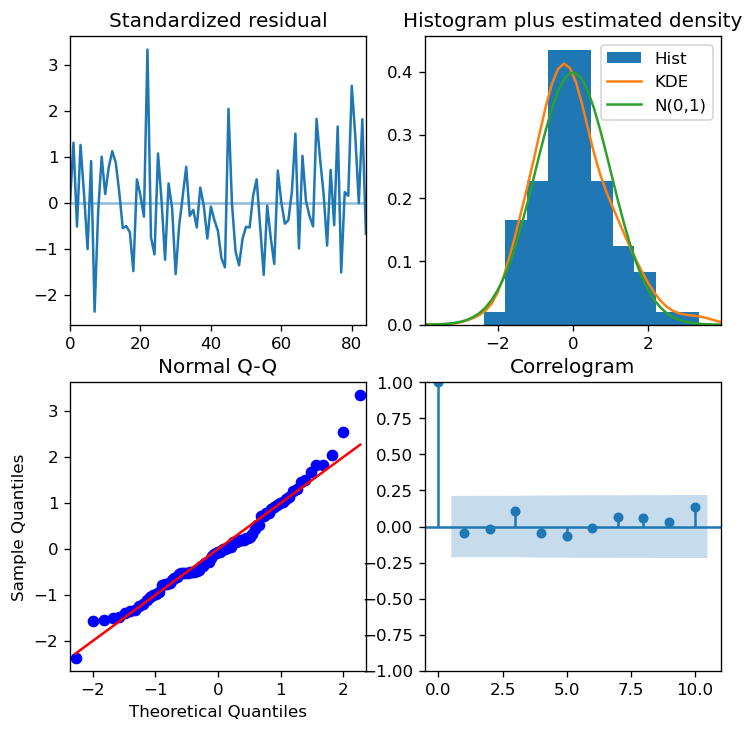

In [205]:
model2 = auto_arima(df_city_train['burglarys city'], trace=True, suppress_warnings=True)
model2.summary()
model2.plot_diagnostics(figsize=(7, 7))
plt.show()

In [206]:
df_city_test.index

Index(['2018-1', '2018-2', '2018-3', '2018-4', '2018-5', '2018-6', '2018-7',
       '2018-8', '2018-9', '2018-10', '2018-11', '2018-12', '2019-1', '2019-2',
       '2019-3', '2019-4', '2019-5', '2019-6', '2019-7', '2019-8', '2019-9',
       '2019-10', '2019-11', '2019-12'],
      dtype='object', name='year month')

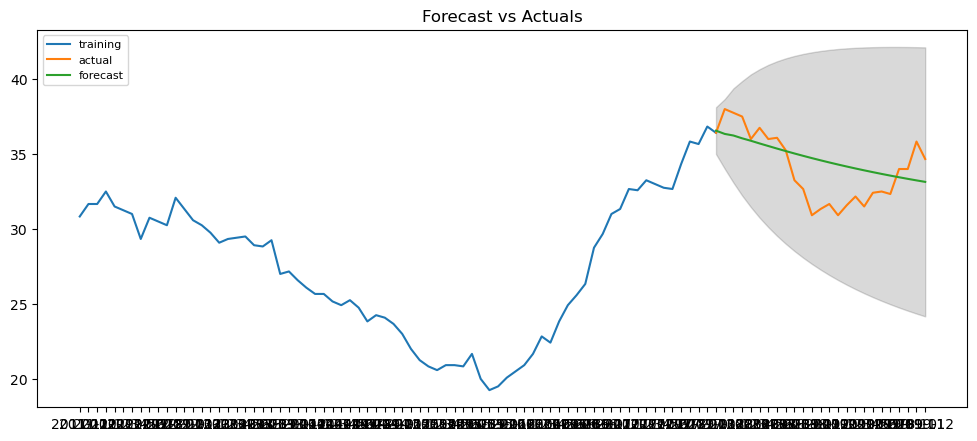

In [281]:
col = 'rolling_mean'
# Build Model
# model = ARIMA(train, order=(3,2,1))
model = ARIMA(df_city_train[col].dropna(), order=(3, 0, 0))
fitted = model.fit(disp=0)

# Forecast
fc, se, conf = fitted.forecast(25, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=df_city_test.index)
lower_series = pd.Series(conf[:, 0], index=df_city_test.index)
upper_series = pd.Series(conf[:, 1], index=df_city_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_city_train[col].dropna(), label='training')
plt.plot(df_city_test[col].dropna(), label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=532.434, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=548.607, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=548.800, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=549.023, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=547.208, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=542.722, Time=0.08 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=537.184, Time=0.21 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=546.484, Time=0.09 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.327, Time=0.25 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=542.997, Time=0.11 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=inf, T

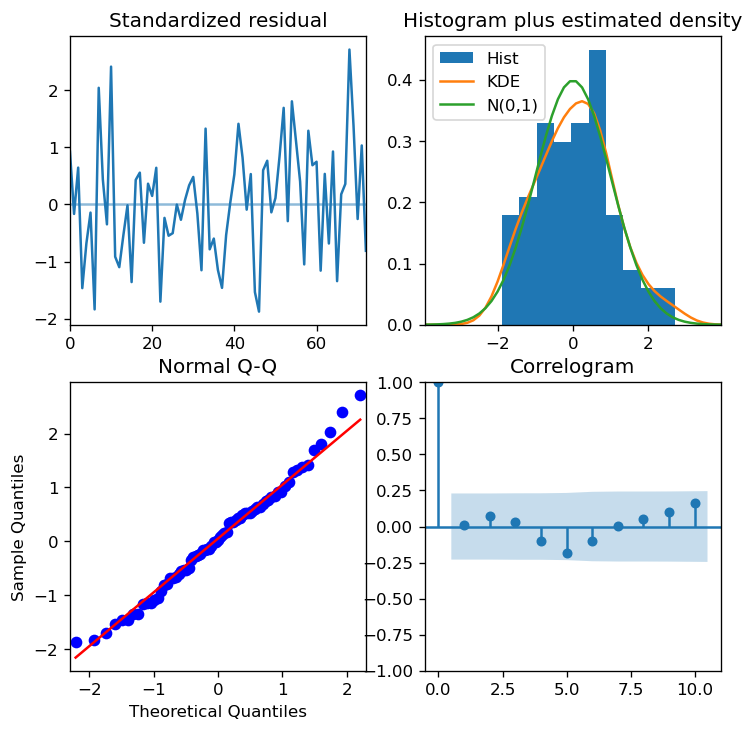

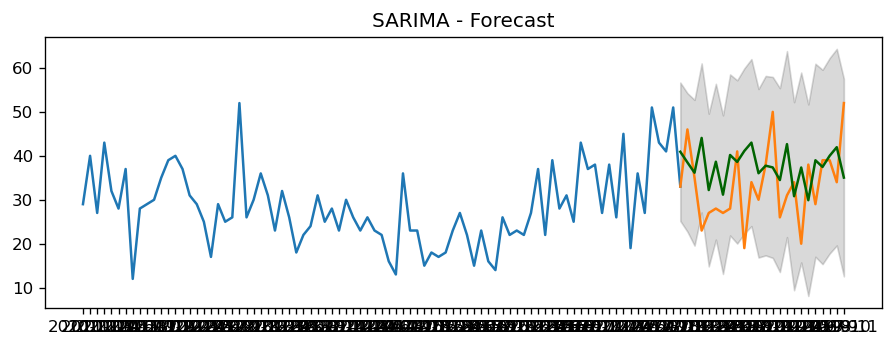

In [293]:
rol = 'rolling_mean'
burg = 'burglarys city'
col = burg
n_periods = 24

df = pd.read_csv('C:\\Users\\20203666\\Documents\\JBG050-data\\final_burglary_data_city1.csv')
#print(sorted(df['city'].unique()))
city = 'West Oxfordshire'

df_city = df.loc[df['city'] == city]
rolling_mean = df_city['burglarys city'].rolling(window = 12).mean()
df_city['rolling_mean'] = rolling_mean
# Reset index to stop expected value error
df_city_index_reset = df_city.reset_index(drop = True)

#Sort it on year/month to perform ARIMA
df_city_sorted = df_city_index_reset.set_index(df_city_index_reset['year month'])

#Create test partition
df_city_train = df_city_sorted['2010-12':'2017-12']
df_city_test  = df_city_sorted['2017-12':'2019-12']


smodel = auto_arima(df_city_train[col].dropna(), start_p=1, start_q=1,
                    test='adf',
                    max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True,
                    d=0, D=1, trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
print(smodel.summary())

fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = df_city_test.index[:n_periods]

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

smodel.plot_diagnostics(figsize=(7, 7))
plt.show()

# Plot
plt.plot(df_city_train[col].dropna())
plt.plot(df_city_test[col][:n_periods].dropna())
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast")
plt.show()